In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic/train.csv')
age_average = titanic_df["Age"].mean();
titanic_df["Age"].fillna(age_average, inplace = True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df['Embarked'].fillna('N', inplace = True)
titanic_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
print(titanic_df['Sex'].value_counts());


male      577
female    314
Name: Sex, dtype: int64


In [48]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts());


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

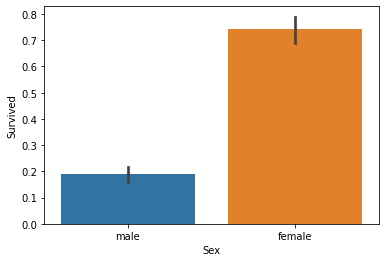

In [49]:
res=titanic_df.groupby(['Sex','Survived'])['Survived'].count();
sns.barplot(x='Sex', y='Survived', data=titanic_df)



<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

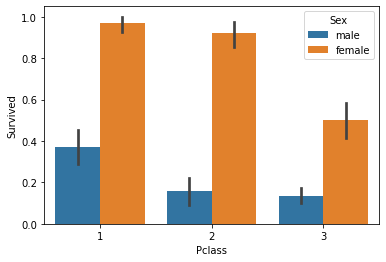

In [50]:
sns.barplot(x='Pclass', y='Survived', hue='Sex',data = titanic_df)

<AxesSubplot:xlabel='Age Category', ylabel='Survived'>

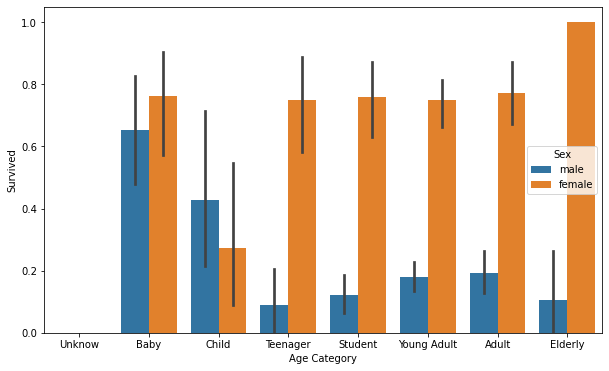

In [51]:
category_map={-1:'Unknow', 5:"Baby", 12:"Child", 18:'Teenager',
                  25:"Student", 35:"Young Adult", 60:'Adult',150:'Elderly'}

def get_category(age):
    category_map={-1:'Unknow', 5:"Baby", 12:"Child", 18:'Teenager',
                  25:"Student", 35:"Young Adult", 60:'Adult',150:'Elderly'}
    
    for key in category_map:
        value=category_map[key]
        if age<=key:
            return value;
        
        
plt.figure(figsize=(10,6))
group_names = []
for key in category_map:
    group_names.append(category_map[key])

titanic_df['Age Category'] = titanic_df["Age"].apply(lambda x: get_category(x))
sns.barplot(x="Age Category", y='Survived', hue='Sex', data = titanic_df, order=group_names)


In [52]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder();
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

#titanic_df = encode_features(titanic_df)
titanic_df.head()
        
        
from sklearn import preprocessing
        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


In [59]:
from sklearn import preprocessing
def fillna(df):
    df['Age'].fillna(df["Age"].mean(), inplace =True)
    df['Cabin'].fillna('N', inplace = True);
    df['Embarked'].fillna('N', inplace = True);
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True);
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder();
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df =drop_features(df)
    df=format_features(df)
    return df;



    

In [60]:
titanic_df = pd.read_csv('./titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)


In [68]:
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score;

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression();

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier: 0.7877
RandomForestClassifier: 0.8547
LogisticRegression: 0.8492


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        print('accuracy: {0:.4f}'.format(accuracy))
    return
exec_kfold(dt_clf,folds=5)
        
        

accuracy: 0.7542
accuracy: 0.7809
accuracy: 0.7865
accuracy: 0.7697
accuracy: 0.8202


In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count,accuracy in enumerate(scores):
    print('{0:.4f}'.format(accuracy))


    

0.7430
0.7753
0.7921
0.7865
0.8427


In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf= GridSearchCV(dt_clf, param_grid=parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('best hyper parameter: ', grid_dclf.best_params_)
print('best Accuracy: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy= accuracy_score(y_test, dpredictions)
print("{0:.4f}".format(accuracy))
print()
best_dclf=grid_dclf.best_estimator_
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print(accuracy)

best hyper parameter:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
best Accuracy: 0.7992
0.8715

0.8715083798882681
